In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid']=False

# Load Data

In [3]:
filepath = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'

In [4]:
df = pd.read_csv(filepath)

In [5]:
df.shape

(19735, 29)

In [6]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


**Attribute Information:**

-  date shows that The data is collected every 10 minutes


date time year-month-day hour:minute:second

Appliances, energy use in Wh

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

# Data Wrangling

### Datatypes

In [7]:
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

-  Date is an object, we have to convert this to datetime

In [9]:
# convert date to datetime
df.index = pd.to_datetime(df['date'],  infer_datetime_format=True)

In [10]:
df.index

DatetimeIndex(['2016-01-11 17:00:00', '2016-01-11 17:10:00',
               '2016-01-11 17:20:00', '2016-01-11 17:30:00',
               '2016-01-11 17:40:00', '2016-01-11 17:50:00',
               '2016-01-11 18:00:00', '2016-01-11 18:10:00',
               '2016-01-11 18:20:00', '2016-01-11 18:30:00',
               ...
               '2016-05-27 16:30:00', '2016-05-27 16:40:00',
               '2016-05-27 16:50:00', '2016-05-27 17:00:00',
               '2016-05-27 17:10:00', '2016-05-27 17:20:00',
               '2016-05-27 17:30:00', '2016-05-27 17:40:00',
               '2016-05-27 17:50:00', '2016-05-27 18:00:00'],
              dtype='datetime64[ns]', name='date', length=19735, freq=None)

In [11]:
del df['date']

In [14]:
df.index.min(), df.index.max()

(Timestamp('2016-01-11 17:00:00'), Timestamp('2016-05-27 18:00:00'))

### Duplicates

In [15]:
df.duplicated().sum()

0

### Missing Values

In [18]:
df.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

### Outliers

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


In [20]:
import seaborn as sns

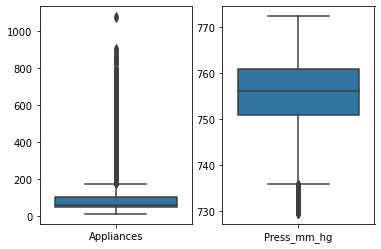

In [30]:
fig, axes = plt.subplots(1,2)
sns.boxplot(data=df[['Appliances']], ax=axes[0])
sns.boxplot(data=df[['Press_mm_hg']], ax=axes[1])
plt.show();

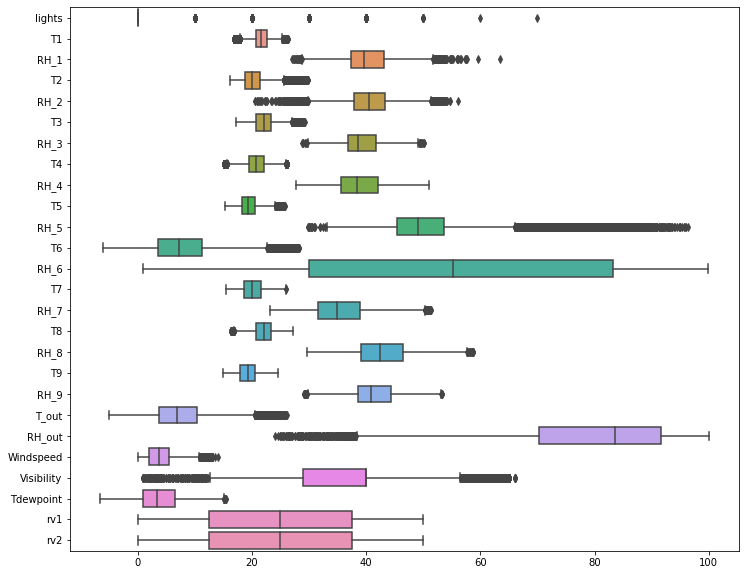

In [33]:
fig = plt.figure(figsize=(12, 10))
fig = sns.boxplot(data=df.drop(['Appliances', 'Press_mm_hg'], axis=1), orient='h')

-  We can clearly see that most of these variables have outliers
-  

# EDA

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

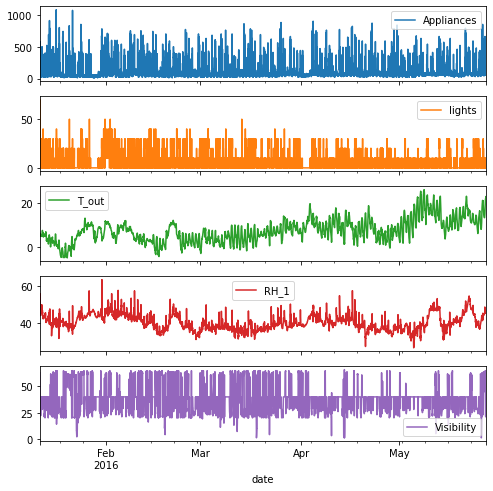

In [13]:
df[['Appliances', 'lights', 'T_out', 'RH_1', 'Visibility']].plot(subplots=True, figsize=(8,8))

-  We can see some spikes in the beginning of the year (Appliances and lights)
    -  This could signify cold season
    -  we can also see that the temperature is low during this period
-  Theres a big drop in appliances usage and lights usage towards the end of January and the beginning of April
    -  However, the temperature is high. 

# Modelling

In [34]:
# we are going to use the following features for our model
df_input = df[['Appliances', 'lights', 'T_out', 'RH_1', 'Visibility']]

In [37]:
df_input.head()

,Appliances,lights,T_out,RH_1,Visibility
date,,,,,
2016-01-11 17:00:00,60,30,6.600000,47.596667,63.000000
2016-01-11 17:10:00,60,30,6.483333,46.693333,59.166667
2016-01-11 17:20:00,50,30,6.366667,46.300000,55.333333
2016-01-11 17:30:00,50,40,6.250000,46.066667,51.500000
2016-01-11 17:40:00,60,40,6.133333,46.333333,47.666667


In [38]:
df_input.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.00
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.00
T_out,19735.0,7.411665,5.317409,-5.000000,3.666667,6.916667,10.408333,26.10
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.36
Visibility,19735.0,38.330834,11.794719,1.000000,29.000000,40.000000,40.000000,66.00


### Scaling

-  We will use MinMax scalar to account for outliers
-  So that the Neural Networks grdient can converge faster

In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [40]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [42]:
data_scaled

array([[0.04672897, 0.42857143, 0.37299035, 0.56618659, 0.95384615],
       [0.04672897, 0.42857143, 0.36923901, 0.54132648, 0.89487179],
       [0.03738318, 0.42857143, 0.36548767, 0.53050179, 0.83589744],
       ...,
       [0.24299065, 0.14285714, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.14285714, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.14285714, 0.87459807, 0.53875791, 0.4       ]])

-  The appliance is going to be our input as well as our target

In [43]:
features = data_scaled
target = data_scaled[:,0]

In [44]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [45]:
# Preparing the data
# window lenght = 2, 2 time periods of data, data is in 10 min interavels, so in this case 20 minutes of data
# and we are going to predict the next one (next 30 min)
# sampling rate =1
# bacth size = 1 for simplicity, in real world more batch makes sense
TimeseriesGenerator(features, target, length = 2, sampling_rate=1, batch_size=1)[0]

(array([[[0.04672897, 0.42857143, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.42857143, 0.36923901, 0.54132648, 0.89487179]]]),
 array([0.03738318]))

-  The model is taking the first two values (rows) and is predicting the third value

### Train Test Split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# we set our test set to be 20% and train set to be 80%
# Shuffle = False, this is important because we are dealing with a timeseries data, the order is very important
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle=False)

In [50]:
x_train.shape, x_test.shape

((15788, 5), (3947, 5))

In [64]:
# define the actual timeseries generator

win_length = 720  # This is 5 days of data that will be used to predict the next observation
bacth_size = 32
num_features = 5
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=bacth_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=bacth_size)

In [65]:
# It contains 32 batches because the batch size is 32
train_generator[0]

(array([[[0.04672897, 0.42857143, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.42857143, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.42857143, 0.36548767, 0.53050179, 0.83589744],
         ...,
         [0.06542056, 0.14285714, 0.25241158, 0.31584258, 0.79230769],
         [0.05607477, 0.28571429, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.28571429, 0.22561629, 0.31107238, 0.66410256]],
 
        [[0.04672897, 0.42857143, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.42857143, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.57142857, 0.36173633, 0.52408036, 0.77692308],
         ...,
         [0.05607477, 0.28571429, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.28571429, 0.22561629, 0.31107238, 0.66410256],
         [0.06542056, 0.28571429, 0.21221865, 0.30923768, 0.6       ]],
 
        [[0.03738318, 0.42857143, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.57142857, 0.3617363

-  The last array ha 32 entries, from the 32 batches
-  This array is the predicted target column in a form of an array

### Build LSTM Model

In [61]:
from tensorflow import keras
import tensorflow as tf

In [66]:
# Define LSTM with Multiple Layers
# return sequence = True, because we want to return the hidden layer each an every observation
# Activation = we use LeakyReLU
# return sequence = False, here the model will return 1 hidden layer
#  Dense =1, to retun the final prediction
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape = (win_length, num_features), return_sequences = True))
model.add(keras.layers.LeakyReLU(alpha= 0.5))
model.add(keras.layers.LSTM(128, return_sequences=True))
model.add(keras.layers.LeakyReLU(alpha = 0.5))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.LSTM(64, return_sequences=False))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(1))

In [67]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 720, 128)          68608     
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 lstm_10 (LSTM)              (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 dropout_3 (Dropout)         (None, 720, 128)          0         
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_4 (Dropout)         (None, 64)               

In [69]:
%%time
# Define early stopping
# patience =2, if the validaation loss does not improve for at least 2 trainings, stop the iteration
early_stopping = keras.callbacks.EarlyStopping(monitor= 'val_loss',
                                              patience=2,
                                              mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
             optimizer =tf.optimizers.Adam(),
             metrics=[tf.metrics.MeanAbsoluteError()])

# fit the model
history = model.fit_generator(train_generator, epochs=50, validation_data=test_generator, shuffle=False,
                             callbacks = [early_stopping])

Epoch 1/50
471/471 [==============================] - 800s 2s/step - loss: 0.0079 - mean_absolute_error: 0.0488 - val_loss: 0.0055 - val_mean_absolute_error: 0.0468
Epoch 2/50
471/471 [==============================] - 792s 2s/step - loss: 0.0060 - mean_absolute_error: 0.0401 - val_loss: 0.0038 - val_mean_absolute_error: 0.0339
Epoch 3/50
471/471 [==============================] - 825s 2s/step - loss: 0.0044 - mean_absolute_error: 0.0331 - val_loss: 0.0033 - val_mean_absolute_error: 0.0287
Epoch 4/50
471/471 [==============================] - 771s 2s/step - loss: 0.0042 - mean_absolute_error: 0.0319 - val_loss: 0.0033 - val_mean_absolute_error: 0.0317
Epoch 5/50
471/471 [==============================] - 783s 2s/step - loss: 0.0040 - mean_absolute_error: 0.0310 - val_loss: 0.0032 - val_mean_absolute_error: 0.0301
Epoch 6/50
471/471 [==============================] - 775s 2s/step - loss: 0.0040 - mean_absolute_error: 0.0308 - val_loss: 0.0032 - val_mean_absolute_error: 0.0304
Epoch 7/50

### Evaluate the Model

In [70]:

model.evaluate_generator(test_generator, verbose = 0)

[0.0031569022685289383, 0.026908935979008675]

In [71]:
predictions = model.predict_generator(test_generator)

In [72]:
predictions.shape[0]

3227

In [73]:
predictions

array([[0.06444787],
       [0.09442543],
       [0.12131979],
       ...,
       [0.08770621],
       [0.2659944 ],
       [0.27041692]], dtype=float32)

In [74]:
y_test

array([0.3364486 , 0.54205607, 0.28971963, ..., 0.24299065, 0.38317757,
       0.39252336])

In [75]:
x_test

array([[0.3364486 , 0.        , 0.34297964, 0.30923768, 0.6       ],
       [0.54205607, 0.        , 0.34726688, 0.3055683 , 0.6       ],
       [0.28971963, 0.        , 0.35155413, 0.30455921, 0.6       ],
       ...,
       [0.24299065, 0.14285714, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.14285714, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.14285714, 0.87459807, 0.53875791, 0.4       ]])

In [76]:
# Lets take x_test data from 720 onwards
x_test[:,1:][win_length:]

array([[0.        , 0.45337621, 0.20851298, 0.6       ],
       [0.14285714, 0.47106109, 0.18282726, 0.6       ],
       [0.        , 0.48874598, 0.18466196, 0.6       ],
       ...,
       [0.14285714, 0.88317256, 0.53866618, 0.37435897],
       [0.14285714, 0.87888532, 0.54949087, 0.38717949],
       [0.14285714, 0.87459807, 0.53875791, 0.4       ]])

In [77]:
# Concatenate predictions with the x_test data from 720
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])], axis=1)

### Inverse tansform to get the original data format

In [78]:
reverse_transformation = scaler.inverse_transform(df_pred)

In [79]:
reverse_transformation

array([[ 78.9592234 ,   0.        ,   9.1       ,  34.6       ,
         40.        ],
       [111.03521265,  10.        ,   9.65      ,  33.66666667,
         40.        ],
       [139.81217869,   0.        ,  10.2       ,  33.73333333,
         40.        ],
       ...,
       [103.84564281,  10.        ,  22.46666667,  46.59666667,
         25.33333333],
       [294.61400777,  10.        ,  22.33333333,  46.99      ,
         26.16666667],
       [299.3460995 ,  10.        ,  22.2       ,  46.6       ,
         27.        ]])

In [80]:
df_final = df_input[predictions.shape[0]*-1:]

In [81]:
df_final.count()

Appliances    3227
lights        3227
T_out         3227
RH_1          3227
Visibility    3227
dtype: int64

In [82]:
df_final['App_Pre'] = reverse_transformation[:,0]

<AxesSubplot:xlabel='date'>

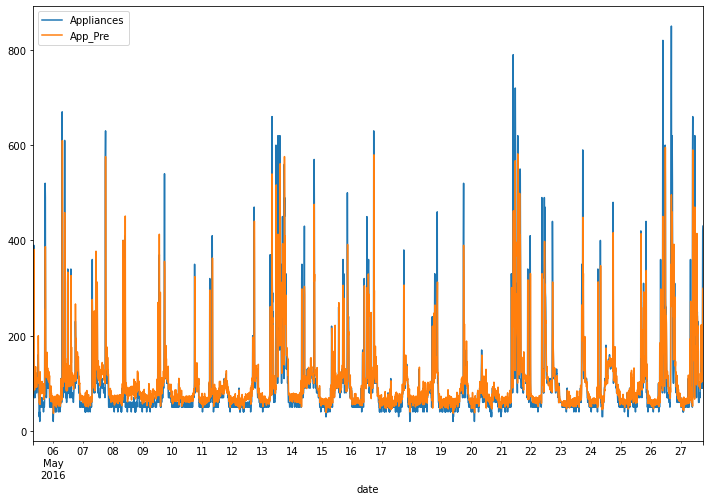

In [85]:
df_final[['Appliances', 'App_Pre']].plot(figsize = (12,8))

### Conclusion

-  Comparing the actual and predicted values:
    -  The model performed pretty well except when it comes to matching the spikes. these could be due to outliers in the dataset.
    -  The validation loss was 0.0032, which is actually a good score
    -  it is quite obvious that the model could further be improved. Some considerations could be:
        -  Feature Engineering
        -  Outlier imputation
        -  Model pameter tuning such as using Gridsearch or Randomsearch

### References

-  https://www.youtube.com/watch?v=4FmVIpcwl4k
-  Data: https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction